In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('titanic.csv')

In [44]:
# 1. Identify the passengers with the highest and lowest fares and their survival status
max_fare = df[df['Fare'] == df['Fare'].max()]
min_fare = df[df['Fare'] == df['Fare'].min()]
print("Passenger with Highest Fare:\n", max_fare[['Name', 'Fare', 'Survived']])
print("\nPassenger with Lowest Fare:\n", min_fare[['Name', 'Fare', 'Survived']])


Passenger with Highest Fare:
                                    Name      Fare  Survived
258                    Ward, Miss. Anna  512.3292         1
679  Cardeza, Mr. Thomas Drake Martinez  512.3292         1
737              Lesurer, Mr. Gustave J  512.3292         1

Passenger with Lowest Fare:
                                  Name  Fare  Survived
179               Leonard, Mr. Lionel   0.0         0
263             Harrison, Mr. William   0.0         0
271      Tornquist, Mr. William Henry   0.0         1
277       Parkes, Mr. Francis "Frank"   0.0         0
302   Johnson, Mr. William Cahoone Jr   0.0         0
413    Cunningham, Mr. Alfred Fleming   0.0         0
466             Campbell, Mr. William   0.0         0
481  Frost, Mr. Anthony Wood "Archie"   0.0         0
597               Johnson, Mr. Alfred   0.0         0
633     Parr, Mr. William Henry Marsh   0.0         0
674        Watson, Mr. Ennis Hastings   0.0         0
732              Knight, Mr. Robert J   0.0         

In [45]:
# 2. Calculate the survival rate for female passengers aged above 50
females_over_50 = df[(df['Sex'] == 'female') & (df['Age'] > 50)]
survival_rate = females_over_50['Survived'].mean()
print(f"Survival rate for females aged above 50: {survival_rate:.2%}")

Survival rate for females aged above 50: 94.12%


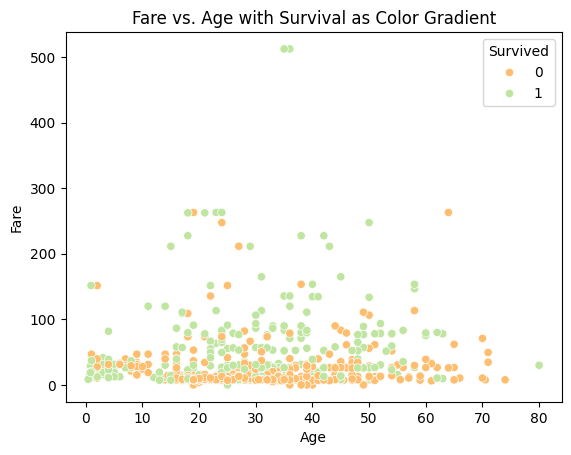

In [46]:
# 3. Create a scatter plot of fare vs. age with survival as a color gradient

sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='Spectral')
plt.title('Fare vs. Age with Survival as Color Gradient')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

In [47]:
#4. Compare survival rates for passengers with no family members vs. small families (family size ≤ 3).
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
no_family = df[df['FamilySize'] == 1]
small_family = df[(df['FamilySize'] > 1) & (df['FamilySize'] <= 3)]

no_family_rate = no_family['Survived'].mean()
small_family_rate = small_family['Survived'].mean()
print(f"Survival rate for no family: {no_family_rate:.2%}")
print(f"Survival rate for small families: {small_family_rate:.2%}")

Survival rate for no family: 30.35%
Survival rate for small families: 56.27%


In [48]:
# 5. Replace missing deck values with a new category “Missing”.
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('Missing')
print("Deck Value Counts:\n", df['Deck'].value_counts())

Deck Value Counts:
 Deck
Missing    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


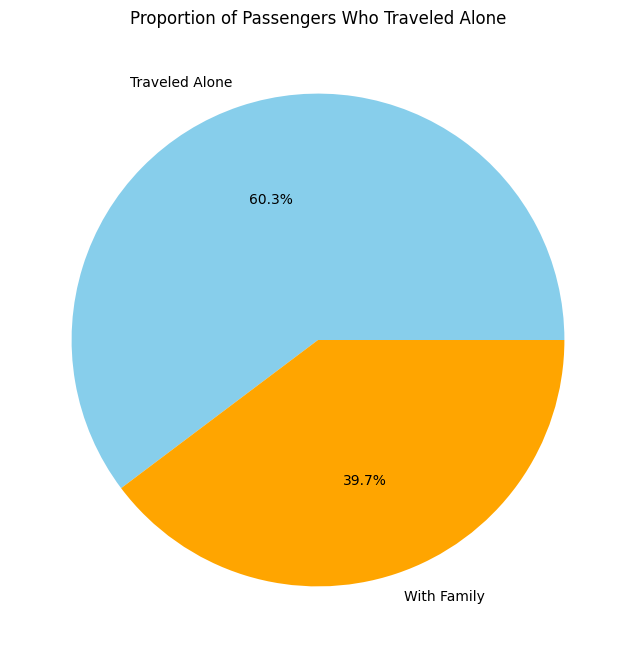

In [49]:
# 6. Plot a pie chart for the proportion of passengers who traveled alone.
alone_passengers = df['FamilySize'] == 1
alone_count = alone_passengers.sum()
with_family_count = len(df) - alone_count

# Creation of the pie Chart
plt.figure(figsize=(8, 8))
plt.pie([alone_count, with_family_count],
        labels=['Traveled Alone', 'With Family'],
        autopct='%1.1f%%',
        colors=['skyblue', 'orange'])
plt.title('Proportion of Passengers Who Traveled Alone')
plt.show()